# Análise do Portfolio de Fundos

### Inicializações

In [3]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta,date
import math
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("whitegrid")

import utils



In [4]:
df_portofolio, df_quotes, _, _ = utils.load_data()
df_quotes = df_quotes.bfill()
df_quotes

,LU1529955046,IE00BMW4NG08,LU0119100252,LU1704639860,IE0032860565,LU0748075263,LU2226639461,LU0607519609,LU0622223799,LU0273145622,...,MILN,MEU.PA,UIM1.AS,ARKG,UIQL.DE,XDBC.DE,JPSR.AS,PTH,10AK.DE,UIM2.AS
2025-03-27,128.80,8.62,19.19,163.422312,288.19,116.239553,9.62,11.09,191.05,201.52,...,41.123186,199.729996,53.840000,20.933917,10.4545,27.049999,23.961000,37.325480,45.688999,26.075001
2025-03-26,128.80,8.62,19.19,163.422312,288.19,116.239553,9.62,11.09,191.05,201.52,...,41.123186,201.190002,54.389999,20.933917,10.4540,27.125000,23.966000,37.325480,45.764000,26.680000
2025-03-25,128.61,8.63,19.18,162.777970,289.09,115.948128,9.64,11.08,190.28,200.28,...,41.656400,202.550003,55.040001,21.778518,10.4485,27.049999,23.966000,38.253795,45.766998,26.680000
2025-03-24,128.78,8.63,19.19,162.526905,289.11,115.639693,9.56,11.09,189.72,205.50,...,41.388493,201.020004,54.419998,22.300354,10.4495,27.004999,23.847000,38.444735,45.775002,26.680000
2025-03-21,128.68,8.65,19.19,159.004495,288.48,114.274712,9.56,11.08,189.28,202.46,...,40.160266,201.250000,54.560001,21.440874,10.4455,26.980000,23.862000,37.135373,45.877998,26.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,119.56,8.48,17.23,140.303975,256.40,108.413707,9.55,10.40,170.36,164.26,...,28.428650,158.139999,41.689999,24.778390,9.9612,23.475000,19.921000,31.588439,45.431000,22.725000
2023-10-05,119.56,8.50,17.25,139.638927,256.70,109.616084,9.63,10.40,169.51,161.82,...,28.254842,156.899994,41.244999,25.169134,9.9532,23.145000,20.011999,31.416388,45.679001,22.580000
2023-10-04,119.56,8.50,17.22,140.609414,256.55,109.685432,9.54,10.39,169.11,162.19,...,28.506411,156.539993,41.230000,25.003786,9.9472,23.375000,19.681999,30.762176,45.650002,22.485001
2023-10-03,119.56,8.47,17.26,139.835350,256.95,110.813640,9.67,10.40,171.12,164.46,...,28.362561,156.800003,41.189999,25.305632,9.9748,23.680000,19.879000,30.760339,45.715000,22.504999


In [5]:

code2name_dict = df_portofolio['Nome'].to_dict()

#Create a DataFrame with the daily growth
df_grow = df_quotes.apply(lambda x: x/x.shift(-1), axis=0)

# Calculate the Portofolio Std and Growth
df_portofolio['STD'] = df_grow.std(axis=0)
df_portofolio['Growth'] = df_quotes.apply(lambda x: x.iloc[0]/x.iloc[-1]-1)
df_portofolio['Racio'] = (df_portofolio['Growth']-0.03)/df_portofolio['STD']

# Get the last Quotes
last_quotes = df_quotes.iloc[0]

df_portofolio['Amount EUR'] = last_quotes * df_portofolio['Quantidade']

df_portofolio.sort_values(by="Nome", axis=0)

,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0524465977,Alken European Opport A,EUR,76.8238,0.008787,0.519879,55.748865,27077.316548
MEUD.PA,Amundi Stoxx Europe 600,EUR,90.0000,0.005896,0.146412,19.742881,23093.099670
LU1965927921,DWS Invest ESG Floating Rate,EUR,1321.0000,0.000121,0.064424,283.842115,142958.620000
QTUM,Defiance Quantum,USD,500.0000,0.015864,0.586411,35.073870,36259.705254
YINN,Direxion Daily FTSE China Bull 3X,USD,350.0000,0.057162,0.478283,7.842354,14038.011065
LU0140363267,Franklin Mutual European Fund,EUR,889.0470,0.005882,0.279837,42.477503,25168.920570
SGLD.AS,Invesco Physical Gold ETC,EUR,85.0000,0.013470,0.813604,58.175362,23049.451141
SC0U.DE,Invesco STOXX Europe 600 Banks,EUR,140.0000,0.010880,0.847113,75.103779,20736.799316
IE00B3XBYN16,Nomura Ireland Japan Strategic Value,USD,60.8068,0.010956,0.254983,20.534571,14562.505297


In [6]:
sum(df_portofolio['Amount EUR'])

422464.3921765811

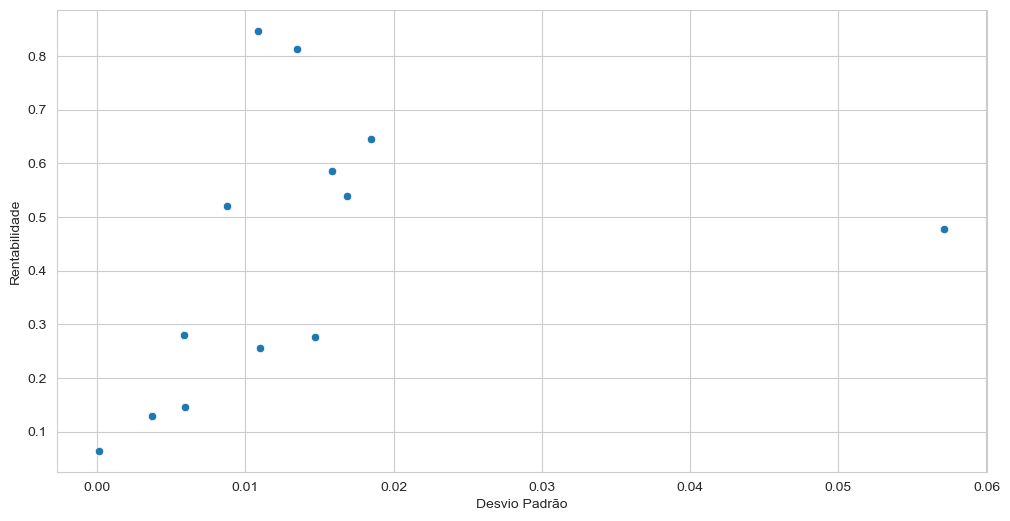

In [7]:
plt.figure(figsize=(12,6))
plt.xlabel('Desvio Padrão')
plt.ylabel('Rentabilidade')
p = sn.scatterplot(x=df_portofolio['STD'],y=df_portofolio['Growth'])

<Figure size 1200x800 with 0 Axes>

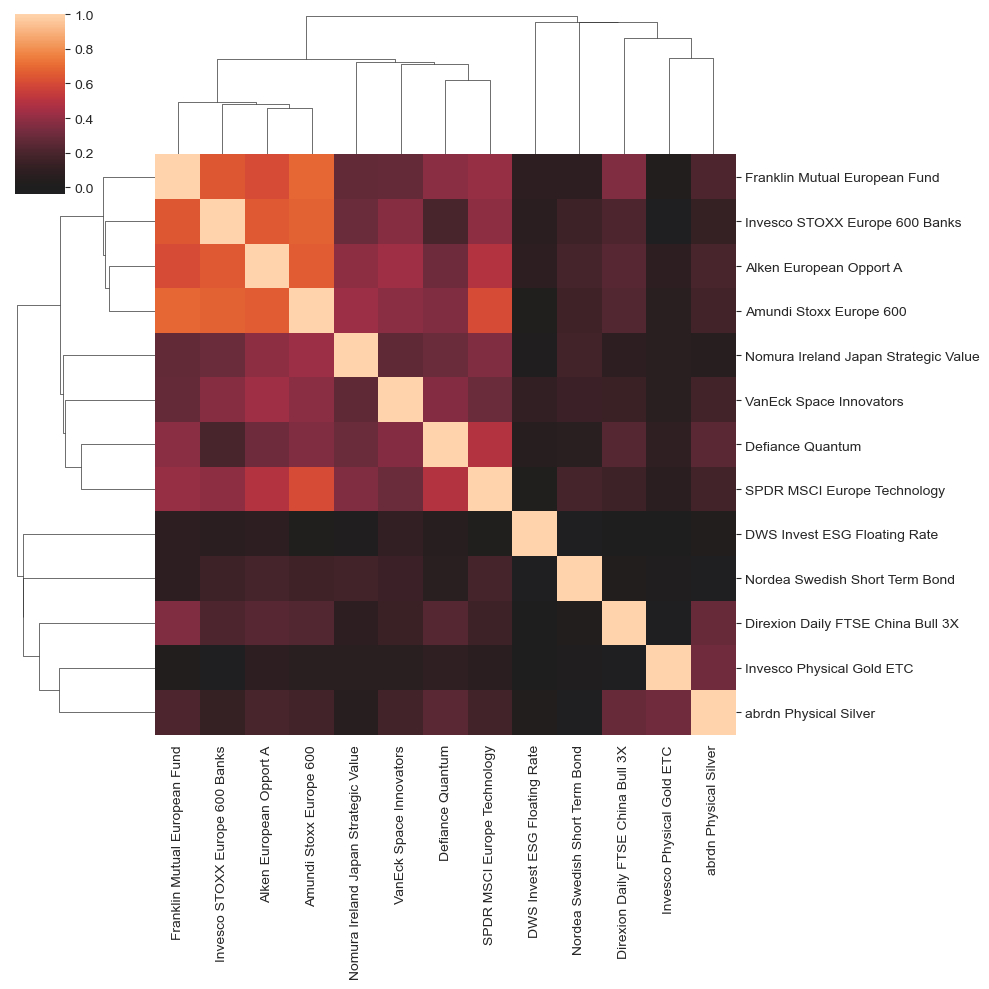

In [8]:
plt.figure(figsize=(12,8))
sn.clustermap(df_grow[df_portofolio.index].rename(columns=code2name_dict).corr(),center=0)
#df_grow.corr()

In [9]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =130
finish = 0
print('Start Date:',df_quotes.index[start])
df_portofolio_tmp['Growth'] = df_quotes.apply(lambda x: x.iloc[finish]/x.iloc[start]-1)
df_portofolio_tmp['Racio'] = (df_portofolio_tmp['Growth']-0.0175)/df_portofolio_tmp['STD']
# Save Portfoloio
# df_portofolio_tmp.sort_values(by=['Racio'],ascending=False).to_csv("portfolio_data.csv",sep=",")
# Show Portfolio
df_portofolio_tmp.sort_values(by=['STD'],ascending=True).to_csv('portfolio_tmp.csv')

Start Date: 2024-09-24


Start Date: 2024-09-24


<Axes: >

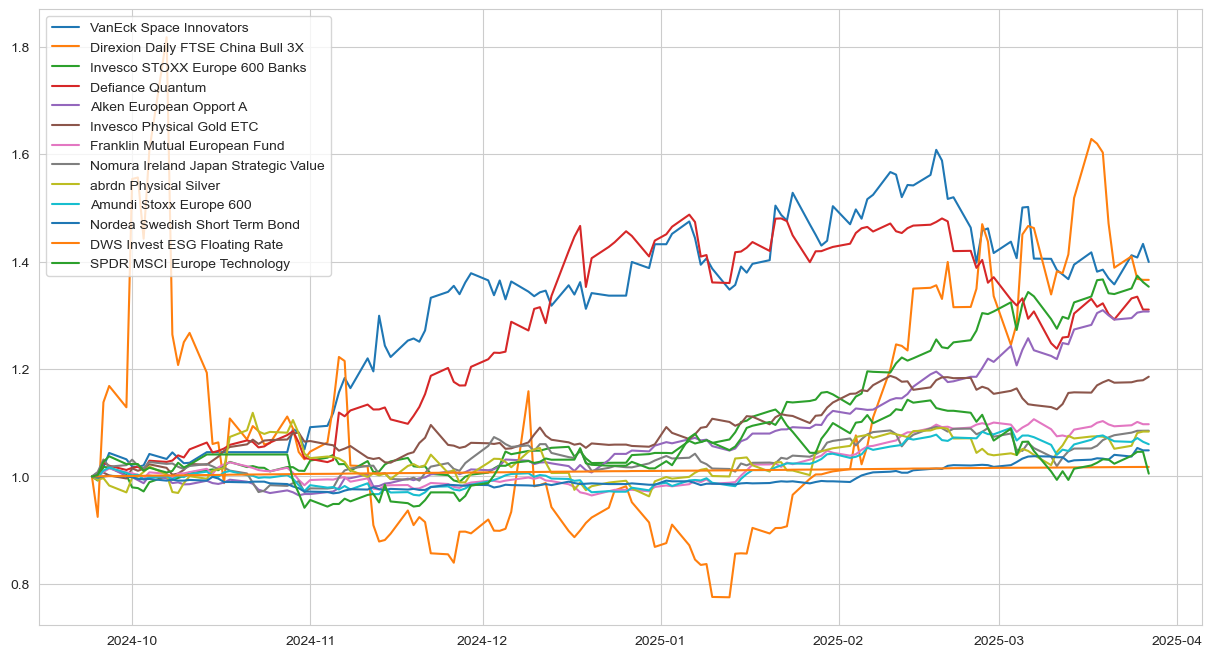

In [10]:
# Select Funds
fund_filter = df_portofolio.index
#fund_filter = []

print('Start Date:',df_quotes.index[start])
df_tmp = df_quotes[fund_filter].apply(lambda x: x/x.iloc[start], axis=0)
df_tmp = df_tmp.sort_values(by=df_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [11]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =15
finish = 0
print('Start Date:',df_quotes.index[start])
df_portofolio_tmp['Growth'] = df_quotes.apply(lambda x: x.iloc[finish]/x.iloc[start]-1)
df_portofolio_tmp['Racio'] = (df_portofolio_tmp['Growth']-0.00175)/df_portofolio_tmp['STD']
# Save Portfoloio
# df_portofolio_tmp.sort_values(by=['Nome'],ascending=True)
df_portofolio_tmp.sort_values(by=['Racio'],ascending=False) #.to_csv("portfolio_data.csv",sep=",")


Start Date: 2025-03-06


,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0524465977,Alken European Opport A,EUR,76.8238,0.008787,0.039521,4.298390,27077.316548
SGLD.AS,Invesco Physical Gold ETC,EUR,85.0000,0.013470,0.045172,3.223720,23049.451141
LU0173778175,Nordea Swedish Short Term Bond,EUR,1542.6480,0.003681,0.011104,2.540940,25284.000720
SIVR,abrdn Physical Silver,USD,1000.0000,0.016826,0.034337,1.936750,29813.843164
IE00B3XBYN16,Nomura Ireland Japan Strategic Value,USD,60.8068,0.010956,0.021456,1.798574,14562.505297
QTUM,Defiance Quantum,USD,500.0000,0.015864,0.013190,0.721116,36259.705254
SC0U.DE,Invesco STOXX Europe 600 Banks,EUR,140.0000,0.010880,0.007345,0.514252,20736.799316
LU0140363267,Franklin Mutual European Fund,EUR,889.0470,0.005882,0.000353,-0.237458,25168.920570
YINN,Direxion Daily FTSE China Bull 3X,USD,350.0000,0.057162,-0.068353,-1.226395,14038.011065


Start Date: 2025-03-06


<Axes: >

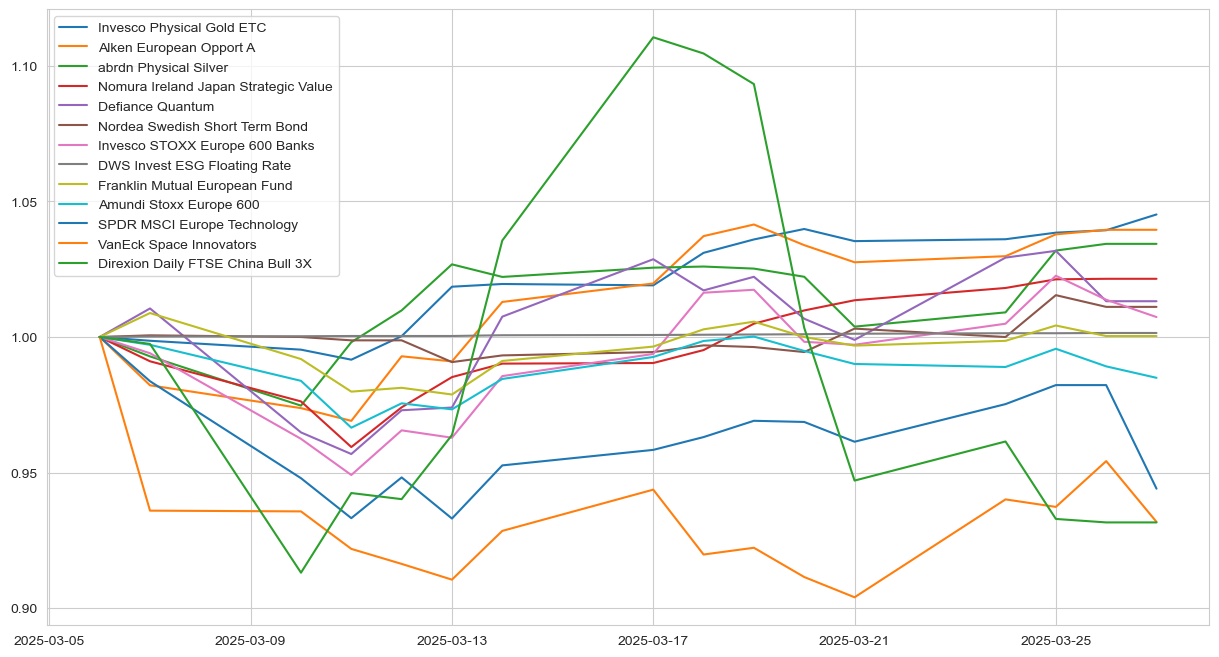

In [12]:

print('Start Date:',df_quotes.index[start])
df_tmp = df_quotes[fund_filter].apply(lambda x: x/x.iloc[start], axis=0)
df_tmp = df_tmp.sort_values(by=df_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [13]:

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

#if 'LU0122613903' in dict_df:
#    del dict_df['LU0122613903']

# Create the DataFrame from the Dictionary of Dataframes, removing rows with null values
#df_all = pd.concat([dict_df[f_name][['Close']].rename(columns={'Close':f_name}) for f_name in dict_df.keys()],axis=1).sort_index(ascending=False)
#df = df_all #.dropna()

# print(df.index)

mu = mean_historical_return(df_quotes[fund_filter].sort_index())
S = CovarianceShrinkage(df_quotes[fund_filter]).ledoit_wolf()
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
df_mu = pd.DataFrame(data = {'Name':df_portofolio['Nome'],'all':list(mu)}, index=list(mu.keys()))
df_w = pd.DataFrame(data = {'Name':df_portofolio['Nome'] ,'all':list(cleaned_weights.values())}, index=list(cleaned_weights.keys()))
df_pp = pd.DataFrame(data = {'all':list(ef.portfolio_performance())}, index=list(['anual return','volatility','sharpe ratio']))
mu_coef = {'all':0.3,90:0.3,5:0.15,10:0.15,30:0.10}
mu_w = mu_coef['all']*mu
for n in mu_coef.keys()-['all']:
    mu = mean_historical_return(df_quotes[fund_filter][:n].sort_index())
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    if n == 60:
        mu_w += 0.30*mu
    else:
        mu_w += 0.175*mu
    df_mu[n] = list(mu)
    df_w[n] = list(cleaned_weights.values())
    df_pp[n] = list(ef.portfolio_performance())
    

ef = EfficientFrontier(mu_w, S)
weights = ef.max_sharpe()

df_w['Avg'] = list(ef.clean_weights().values())
df_w['Now'] = df_portofolio_tmp['Amount EUR']/df_portofolio_tmp['Amount EUR'].sum()
df_pp['Avg'] = list(ef.portfolio_performance())
df_mu['Avg'] = list(mu_w)
df_mu.sort_values(by="Avg",ascending=False)

,Name,all,10,5,90,30,Avg
SIVR,abrdn Physical Silver,0.328385,0.393785,5.598706,0.195745,-0.006995,1.180233
JEDI.DE,VanEck Space Innovators,0.387993,0.105039,5.735349,0.373726,-0.569267,1.104246
LU0524465977,Alken European Opport A,0.317115,1.066574,1.074897,1.154493,1.673285,0.964753
SC0U.DE,Invesco STOXX Europe 600 Banks,0.497418,0.843276,0.898850,1.240435,1.460678,0.926792
SGLD.AS,Invesco Physical Gold ETC,0.479488,1.004143,0.813466,0.364994,0.198028,0.560457
IE00B3XBYN16,Nomura Ireland Japan Strategic Value,0.161181,1.388429,0.632036,0.288545,0.062347,0.463342
QTUM,Defiance Quantum,0.354772,0.170798,1.441051,0.523957,-0.624340,0.370938
LU0173778175,Nordea Swedish Short Term Bond,0.083462,0.648489,0.651505,0.228732,0.367627,0.356901
LU0140363267,Franklin Mutual European Fund,0.176262,0.294780,0.249733,0.385597,0.124602,0.237453
YINN,Direxion Daily FTSE China Bull 3X,0.293285,-0.948233,-0.644542,2.020164,0.109588,0.181956


In [14]:
df_w.sort_values(by=['Avg',5,'all',10,30,90],ascending=False)

,Name,all,10,5,90,30,Avg,Now
LU0173778175,Nordea Swedish Short Term Bond,0.13112,0.48537,0.37013,0.21582,0.30034,0.39349,0.059849
LU0524465977,Alken European Opport A,0.03404,0.16583,0.00000,0.40571,0.55153,0.26101,0.064094
SC0U.DE,Invesco STOXX Europe 600 Banks,0.34165,0.02242,0.00000,0.25133,0.12973,0.11519,0.049085
SIVR,abrdn Physical Silver,0.00000,0.00000,0.34757,0.00000,0.00000,0.10757,0.070571
SGLD.AS,Invesco Physical Gold ETC,0.30258,0.14271,0.00000,0.08916,0.00843,0.07805,0.054560
LU1965927921,DWS Invest ESG Floating Rate,0.13633,0.00486,0.00000,0.03299,0.00997,0.02275,0.338392
JEDI.DE,VanEck Space Innovators,0.00000,0.00000,0.28230,0.00000,0.00000,0.02194,0.047862
QTUM,Defiance Quantum,0.05429,0.00000,0.00000,0.00000,0.00000,0.00000,0.085829
IE00B3XBYN16,Nomura Ireland Japan Strategic Value,0.00000,0.17880,0.00000,0.00000,0.00000,0.00000,0.034470
YINN,Direxion Daily FTSE China Bull 3X,0.00000,0.00000,0.00000,0.00499,0.00000,0.00000,0.033229
